In [1]:
# --- Cell 1 ---
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

pd.set_option("display.max_columns", 200)

# If this notebook is at projects/player-points/notebooks/
# then repo root is two levels up:
REPO_ROOT = Path.cwd().resolve().parents[2]

SEASONS = ["2024-2025", "2025-2026"]  # it's fine if one season is partial

def season_path(season: str) -> Path:
    return REPO_ROOT / "data" / season

# Just warn if something's missing
for season in SEASONS:
    for rel in ["playerstats/playerstats.csv", "players/players.csv", "teams/teams.csv"]:
        fp = season_path(season) / rel
        if not fp.exists():
            print("WARNING: missing", fp)


In [2]:
# --- Cell 2 ---
playerstats_list, players_list, teams_list = [], [], []

for season in SEASONS:
    try:
        base = season_path(season)
        ps = pd.read_csv(base / "playerstats" / "playerstats.csv")
        pl = pd.read_csv(base / "players" / "players.csv")
        tm = pd.read_csv(base / "teams" / "teams.csv")

        ps["season"] = season
        pl["season"] = season
        tm["season"] = season

        playerstats_list.append(ps)
        players_list.append(pl)
        teams_list.append(tm)

        print(f"{season}: playerstats={ps.shape}, players={pl.shape}, teams={tm.shape}")
    except Exception as e:
        print(f"Skipping {season}:", e)

if not playerstats_list:
    raise RuntimeError("No playerstats loaded — check paths in Cell 1.")

playerstats_all = pd.concat(playerstats_list, ignore_index=True)
players_all     = pd.concat(players_list, ignore_index=True)
teams_all       = pd.concat(teams_list,   ignore_index=True)

print("ALL playerstats:", playerstats_all.shape)
print("ALL players:", players_all.shape)
print("ALL teams:", teams_all.shape)

display(playerstats_all.head(2))
display(players_all.head(2))
display(teams_all.head(2))


2024-2025: playerstats=(27657, 59), players=(804, 8), teams=(20, 14)
2025-2026: playerstats=(6507, 88), players=(743, 8), teams=(20, 15)
ALL playerstats: (34164, 88)
ALL players: (1547, 8)
ALL teams: (40, 15)


,id,status,chance_of_playing_next_round,chance_of_playing_this_round,now_cost,now_cost_rank,now_cost_rank_type,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,selected_by_percent,selected_rank,selected_rank_type,total_points,event_points,points_per_game,points_per_game_rank,points_per_game_rank_type,bonus,bps,form,form_rank,form_rank_type,value_form,value_season,dreamteam_count,transfers_in,transfers_in_event,transfers_out,transfers_out_event,ep_next,ep_this,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,expected_goals_per_90,expected_assists_per_90,expected_goal_involvements_per_90,expected_goals_conceded_per_90,influence,influence_rank,influence_rank_type,creativity,creativity_rank,creativity_rank_type,threat,threat_rank,threat_rank_type,ict_index,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,direct_freekicks_order,penalties_order,gw,set_piece_threat,season,first_name,second_name,web_name,news,news_added,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,starts,defensive_contribution,corners_and_indirect_freekicks_text,direct_freekicks_text,penalties_text,saves_per_90,clean_sheets_per_90,goals_conceded_per_90,starts_per_90,defensive_contribution_per_90,tackles,clearances_blocks_interceptions,recoveries
0,5,u,0.0,0.0,4.0,645,55,0,0,0,0,0.0,602,69,0,0,0.0,573,63,0,0,0.0,464,53,0.0,0.0,0,0,0,4399,20,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,566,63,0.0,549,45,0.0,512,31,0.0,566,63,NaN,NaN,NaN,23,NaN,2024-2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,a,100.0,100.0,5.6,100,10,0,0,1,-1,4.4,83,30,72,5,3.6,83,18,5,274,2.0,178,56,0.4,12.9,2,1220019,9591,879735,49584,2.0,2.5,0.71,1.01,1.72,14.7,0.04,0.05,0.09,0.79,270.2,168,62,220.1,122,25,172.0,130,14,66.0,136,35,NaN,NaN,NaN,23,NaN,2024-2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,player_code,player_id,first_name,second_name,web_name,team_code,position,season
0,438098,1,Fábio,Ferreira Vieira,Fábio Vieira,3,Midfielder,2024-2025
1,100051017,735,Mikel,Arteta,Arteta,3,Unknown,2024-2025


,code,id,name,short_name,strength,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id,elo,season,fotmob_name
0,3,1,Arsenal,ARS,5,1350,1350,1390,1400,1310,1300,1,1991,2024-2025,NaN
1,7,2,Aston Villa,AVL,3,1145,1240,1130,1180,1160,1300,2,1870,2024-2025,NaN


In [3]:
# --- Cell 3 ---
df_ps = playerstats_all.copy()

# ensure numeric
df_ps["gw"] = pd.to_numeric(df_ps.get("gw"), errors="coerce")
df_ps["event_points"] = pd.to_numeric(df_ps.get("event_points"), errors="coerce")
df_ps = df_ps.dropna(subset=["gw", "event_points"])
df_ps["gw"] = df_ps["gw"].astype(int)

# sort for rolling/shift
df_ps = df_ps.sort_values(["id", "season", "gw"])

# next GW points (label)
df_ps["next_points"] = df_ps.groupby(["id", "season"])["event_points"].shift(-1)

# drop rows without a future gw
playerstats_model = df_ps.dropna(subset=["next_points"]).copy()

playerstats_model[["id","season","gw","event_points","next_points"]].head(10)


,id,season,gw,event_points,next_points
18642,1,2024-2025,1,0,0.0
18015,1,2024-2025,2,0,0.0
17362,1,2024-2025,3,0,0.0
16705,1,2024-2025,4,0,0.0
16046,1,2024-2025,5,0,0.0
11794,1,2024-2025,6,0,0.0
14723,1,2024-2025,7,0,0.0
11695,1,2024-2025,8,0,0.0
14729,1,2024-2025,9,0,0.0
12192,1,2024-2025,10,0,0.0


In [4]:
# --- Cell 3.5 ---
df = playerstats_model.copy()

# normalize keys
df["id"] = pd.to_numeric(df["id"], errors="coerce").astype("Int64")
players_all["player_id"]   = pd.to_numeric(players_all.get("player_id"), errors="coerce").astype("Int64")
players_all["player_code"] = pd.to_numeric(players_all.get("player_code"), errors="coerce").astype("Int64")

# Build a 'last_name' in players_all first:
# Prefer web_name (shirt name), else second_name, else empty (we'll fill later)
def compute_last_name(pl_row):
    w = str(pl_row.get("web_name") or "").strip()
    if w:
        return w
    s = str(pl_row.get("second_name") or "").strip()
    if s:
        return s
    return ""

players_all["last_name_src"] = players_all.apply(compute_last_name, axis=1)

# Deduplicate per (season, player_id)
players_pid = (players_all
               .dropna(subset=["player_id"])
               .drop_duplicates(subset=["season","player_id"])
               [["season","player_id","last_name_src","position","team_code"]])

# Primary merge: season+id -> season+player_id
df = df.merge(players_pid, left_on=["season","id"], right_on=["season","player_id"], how="left")

# Fallback: if still missing, try player_code mapping for seasons where ids differ
mask_missing = df["last_name_src"].isna()
if mask_missing.any() and "player_code" in players_all.columns:
    players_pcode = (players_all
                     .dropna(subset=["player_code"])
                     .drop_duplicates(subset=["season","player_code"])
                     [["season","player_code","last_name_src","position","team_code"]]
                     .rename(columns={"player_code":"join_code"}))
    df = df.merge(players_pcode, left_on=["season","id"], right_on=["season","join_code"], how="left",
                  suffixes=("","_fb"))
    # fill from fallback
    for col in ["last_name_src","position","team_code"]:
        fb = col + "_fb"
        if fb in df.columns:
            df[col] = df[col].fillna(df[fb])
    df = df.drop(columns=[c for c in df.columns if c.endswith("_fb") or c=="join_code"], errors="ignore")

# Finalize last_name (fallback to id where missing)
df["last_name"] = df["last_name_src"]
df["last_name"] = df["last_name"].fillna(df["id"].astype(str))

# Optional: keep compact player cols
df[["id","season","gw","last_name","position"]].head(10)


,id,season,gw,last_name,position
0,1,2024-2025,1,Fábio Vieira,Midfielder
1,1,2024-2025,2,Fábio Vieira,Midfielder
2,1,2024-2025,3,Fábio Vieira,Midfielder
3,1,2024-2025,4,Fábio Vieira,Midfielder
4,1,2024-2025,5,Fábio Vieira,Midfielder
5,1,2024-2025,6,Fábio Vieira,Midfielder
6,1,2024-2025,7,Fábio Vieira,Midfielder
7,1,2024-2025,8,Fábio Vieira,Midfielder
8,1,2024-2025,9,Fábio Vieira,Midfielder
9,1,2024-2025,10,Fábio Vieira,Midfielder


In [5]:
# --- Cell 4 ---
teams_cols = [c for c in [
    "season","id","name","short_name","elo","strength",
    "strength_overall_home","strength_overall_away",
    "strength_attack_home","strength_attack_away",
    "strength_defence_home","strength_defence_away"
] if c in teams_all.columns]

tm_team = (teams_all[teams_cols]
           .drop_duplicates(["season","id"])
           .rename(columns={"id":"team_id"})
           .add_prefix("team_"))

tm_opp  = (teams_all[teams_cols]
           .drop_duplicates(["season","id"])
           .rename(columns={"id":"opp_id"})
           .add_prefix("opp_"))

# join on season + ids if available
if "team" in df.columns:
    df = df.merge(tm_team, left_on=["season","team"], right_on=["team_season","team_team_id"], how="left")
if "opponent_team" in df.columns:
    df = df.merge(tm_opp, left_on=["season","opponent_team"], right_on=["opp_season","opp_opp_id"], how="left")

# coerce home/away flag
if "was_home" in df.columns:
    df["was_home"] = df["was_home"].astype(int)

# elo differential
if "team_elo" in df.columns and "opp_elo" in df.columns:
    df["elo_diff"] = df["team_elo"] - df["opp_elo"]

# convenience short name (if present)
if "team_short_name" not in df.columns and "team_short_name" in df.columns:
    pass  # already present


In [6]:
# --- Cell 5 ---
grp_keys = ["id","season"] if "season" in df.columns else ["id"]

# Rolling form (points)
df["form_last3"] = df.groupby(grp_keys)["event_points"].transform(lambda s: s.shift().rolling(3, min_periods=1).mean())
df["form_last5"] = df.groupby(grp_keys)["event_points"].transform(lambda s: s.shift().rolling(5, min_periods=1).mean())

# Minutes trend
if "minutes" in df.columns:
    df["minutes_last3"] = df.groupby(grp_keys)["minutes"].transform(lambda s: s.shift().rolling(3, min_periods=1).mean())
    df["minutes_last5"] = df.groupby(grp_keys)["minutes"].transform(lambda s: s.shift().rolling(5, min_periods=1).mean())

# Cost/selection
for c in ["now_cost","selected_by_percent"]:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# Opponent defensive strength (home/away aware)
def pick_opp_def(row):
    if "was_home" in row and "opp_strength_defence_home" in row and "opp_strength_defence_away" in row:
        return row["opp_strength_defence_away"] if row["was_home"] == 1 else row["opp_strength_defence_home"]
    vals = []
    if "opp_strength_defence_home" in row: vals.append(row["opp_strength_defence_home"])
    if "opp_strength_defence_away" in row: vals.append(row["opp_strength_defence_away"])
    return np.nanmean(vals) if vals else np.nan

df["opp_def_str"] = df.apply(pick_opp_def, axis=1)

# Position one-hot (if available from players)
if "position" in df.columns:
    df["position"] = df["position"].fillna("Unknown").astype(str)
    pos_dummies = pd.get_dummies(df["position"], prefix="pos")
    df = pd.concat([df, pos_dummies], axis=1)

df.shape


(32617, 104)

In [7]:
# --- Cell 6 ---
current_season = "2025-2026"
K_test_gws = 4  # use last 4 GWs of current season for testing

cur = df[df["season"] == current_season]
if cur.empty:
    raise RuntimeError("No 2025-2026 rows found — double-check season folders and 'season' tagging.")

unique_gws = sorted(cur["gw"].unique())
test_gws = unique_gws[-K_test_gws:] if len(unique_gws) > K_test_gws else unique_gws[-1:]

train_mask = (
    (df["season"] == "2024-2025") |
    ((df["season"] == current_season) & (~df["gw"].isin(test_gws)))
)
test_mask = ((df["season"] == current_season) & (df["gw"].isin(test_gws)))

exclude_cols = {
    "next_points","event_points","total_points","id","season","gw",
    "last_name","first_name","second_name",
    "team","opponent_team","team_name","opp_name",
    "team_team_id","opp_opp_id","player_id","player_code"
}
feature_cols = [c for c in df.columns
                if (c not in exclude_cols) and pd.api.types.is_numeric_dtype(df[c])]

X_train = df.loc[train_mask, feature_cols].fillna(0.0)
y_train = df.loc[train_mask, "next_points"]
X_test  = df.loc[test_mask,  feature_cols].fillna(0.0)
y_test  = df.loc[test_mask,  "next_points"]

print("Current season:", current_season)
print("Train rows:", len(X_train), "| Test rows:", len(X_test))
print("Test GWs:", sorted(df.loc[test_mask, "gw"].unique().tolist()))
print("Train seasons:", df.loc[train_mask, "season"].unique())
print("Test seasons:", df.loc[test_mask, "season"].unique())


Current season: 2025-2026
Train rows: 29651 | Test rows: 2966
Test GWs: [4, 5, 6, 7]
Train seasons: ['2024-2025' '2025-2026']
Test seasons: ['2025-2026']


In [8]:
# --- Cell 7 ---
def report(y_true, y_pred, label):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    print(f"{label}: R²={r2:.3f} | MAE={mae:.3f} | RMSE={rmse:.3f}")
    return r2, mae, rmse

# Ridge with scaling and SVD solver (stable)
ridge = Pipeline([
    ("scaler", StandardScaler(with_mean=False)),
    ("ridge",  Ridge(alpha=10.0, solver="svd"))
])
ridge.fit(X_train, y_train)
pred_ridge = ridge.predict(X_test)
report(y_test, pred_ridge, "Ridge (scaled, svd)")

# Random Forest
rf = RandomForestRegressor(n_estimators=300, max_depth=None, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
report(y_test, pred_rf, "RandomForest")


Ridge (scaled, svd): R²=0.340 | MAE=0.984 | RMSE=1.849
RandomForest: R²=0.277 | MAE=1.118 | RMSE=1.936


(0.27657815658810436, 1.1184378512025175, 1.9362109032906067)

In [9]:
# --- Cell 8-prep: cache arrays & masks for speed and validation ---

current_season = "2025-2026"  # keep consistent with earlier cells

# Columns we actually model with
exclude_cols = {
    "next_points","event_points","total_points","id","season","gw",
    "last_name","first_name","second_name",
    "team","opponent_team","team_name","opp_name",
    "team_team_id","opp_opp_id","player_id","player_code"
}
feature_cols_cached = [c for c in df.columns
                       if (c not in exclude_cols) and pd.api.types.is_numeric_dtype(df[c])]

# Cache arrays (faster slicing than pandas each time)
X_all = df[feature_cols_cached].fillna(0.0).to_numpy()
y_all = df["next_points"].to_numpy()
gw_all = df["gw"].to_numpy()
season_all = df["season"].to_numpy()
idx_all = np.arange(len(df))

# Masks for the two seasons
mask_24 = (season_all == "2024-2025")
mask_cur = (season_all == current_season)

# Available GWs in current season
gws_cur_sorted = np.unique(gw_all[mask_cur])
print("Available GWs in", current_season, ":", gws_cur_sorted.tolist())

# Build quick-index dicts for inference rows (gw=k-1) and training rows (gw<k)
infer_idx_by_gw = {}   # rows to predict for target_gw = rows with gw == target_gw-1
train_idx_by_gw = {}   # rows to train: all 24-25 + current season gw<target_gw

for k in gws_cur_sorted:
    # INFERENCE rows for predicting k+1 (we’ll fill only for k>=min)
    infer_idx_by_gw[k + 1] = idx_all[mask_cur & (gw_all == k)]
    # TRAIN rows to predict k+1
    train_idx_by_gw[k + 1] = idx_all[mask_24 | (mask_cur & (gw_all < (k + 1)))]

# Helper to report next valid GW
def next_valid_gw():
    # The smallest k for which we can predict is min(gws)+1
    if len(gws_cur_sorted) == 0:
        return None
    return int(gws_cur_sorted.min()) + 1


Available GWs in 2025-2026 : [0, 1, 2, 3, 4, 5, 6, 7]


In [10]:
# --- Cell 8A (REPLACE): fast, validated per-GW prediction ---

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def train_and_predict_for_gw_fast(
    target_gw: int,
    model_type: str = "rf",    # "rf" or "ridge"
    top_n: int = 20
):
    """
    Predicts for target_gw in current_season.
    Requires that rows exist for gw == target_gw-1 in current_season.
    Trains on: all 24-25 + current_season rows with gw < target_gw.
    Uses cached arrays/masks for speed.
    """

    # ---------- Validation ----------
    if len(gws_cur_sorted) == 0:
        raise ValueError(f"No data for {current_season}.")
    min_needed = int(gws_cur_sorted.min()) + 1
    max_possible = int(gws_cur_sorted.max()) + 1  # we can predict at most next unseen gw

    if target_gw not in infer_idx_by_gw:
        hint = f"Valid range is [{min_needed}..{max_possible}] (need gw={target_gw-1} to exist)."
        raise ValueError(f"target_gw={target_gw} is invalid for {current_season}. {hint}")

    infer_idx = infer_idx_by_gw[target_gw]
    train_idx = train_idx_by_gw[target_gw]

    if infer_idx.size == 0:
        hint = f"Need rows for gw={target_gw-1} in {current_season}."
        raise ValueError(f"No inference rows for target_gw={target_gw}. {hint}")

    # ---------- Slice cached arrays ----------
    X_tr, y_tr = X_all[train_idx], y_all[train_idx]
    X_infer = X_all[infer_idx]

    # ---------- Fit ----------
    if model_type == "ridge":
        mdl = Pipeline([
            ("scaler", StandardScaler(with_mean=False)),
            ("ridge",  Ridge(alpha=10.0, solver="svd")),
        ])
    else:
        mdl = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)

    mdl.fit(X_tr, y_tr)
    preds = mdl.predict(X_infer)

    # ---------- Assemble leaderboard ----------
    # Use the original df to fetch ids/names/etc for the inference rows
    out = df.iloc[infer_idx][["id","season","gw"]].copy()
    # gw here is target_gw-1; add predicted_gw and predicted points
    out["predicted_gw"] = target_gw
    out["pred_points"] = preds

    # Attach last_name if present (fallback to id)
    if "last_name" in df.columns:
        out["last_name"] = df.iloc[infer_idx]["last_name"].values
        out["last_name"] = out["last_name"].fillna(out["id"].astype(str))
    else:
        out["last_name"] = out["id"].astype(str)

    # Optional: if event_points/next_points exist for the gw-1 row, include them for context
    for c in ["event_points","next_points"]:
        if c in df.columns:
            out[c] = df.iloc[infer_idx][c].values

    # Format & sort
    out["pred_points"] = out["pred_points"].round(2)
    out = out.sort_values("pred_points", ascending=False).head(top_n).reset_index(drop=True)

    return out


In [11]:
# --- Cell 8A: Function to train up to a target GW and predict that GW ---

def train_and_predict_for_gw(
    season: str,
    target_gw: int,
    model_type: str = "rf",      # "rf" or "ridge"
    top_n: int = 20
):
    """
    Trains on:
      - all of 2024-2025, plus
      - current season rows with gw < (target_gw)
    and predicts the target_gw using rows where gw == (target_gw - 1).
    
    Returns a leaderboard DataFrame of top_n predictions for that target_gw.
    """
    assert season in df["season"].unique(), f"Season {season} not found in data."

    # Check GW availability for current season
    cur = df[df["season"] == season]
    if cur.empty:
        raise RuntimeError(f"No rows for season {season}.")
    min_gw, max_gw = int(cur["gw"].min()), int(cur["gw"].max())

    if target_gw <= min_gw:
        raise ValueError(f"target_gw must be > {min_gw} for season {season} (need features from gw={target_gw-1}).")
    if (target_gw - 1) not in cur["gw"].unique():
        raise ValueError(f"Need gw={target_gw-1} rows to predict gw={target_gw}, but they aren't present yet.")

    # Build masks
    train_mask = (
        (df["season"] == "2024-2025") |
        ((df["season"] == season) & (df["gw"] < target_gw))
    )
    infer_mask = ((df["season"] == season) & (df["gw"] == (target_gw - 1)))

    # Rebuild features exactly like Cell 6
    exclude_cols = {
        "next_points","event_points","total_points","id","season","gw",
        "last_name","first_name","second_name",
        "team","opponent_team","team_name","opp_name",
        "team_team_id","opp_opp_id","player_id","player_code"
    }
    feature_cols_local = [c for c in df.columns
                          if (c not in exclude_cols) and pd.api.types.is_numeric_dtype(df[c])]

    X_tr = df.loc[train_mask, feature_cols_local].fillna(0.0)
    y_tr = df.loc[train_mask, "next_points"]
    X_infer = df.loc[infer_mask, feature_cols_local].fillna(0.0)

    if len(X_infer) == 0:
        raise RuntimeError("No inference rows found — check your target_gw and season.")

    # Fit model
    if model_type == "ridge":
        mdl = Pipeline([
            ("scaler", StandardScaler(with_mean=False)),
            ("ridge",  Ridge(alpha=10.0, solver="svd")),
        ])
    else:
        mdl = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)

    mdl.fit(X_tr, y_tr)
    preds = mdl.predict(X_infer)

    # Build leaderboard mapped to target_gw
    cols_show = ["id","season","gw","event_points","next_points","last_name"]
    have = [c for c in cols_show if c in df.columns]
    out = df.loc[infer_mask, have].copy()
    out["pred_points"] = preds
    out["predicted_gw"] = target_gw

    # Nice formatting
    out["last_name"] = out["last_name"].fillna(out["id"].astype(str))
    out["pred_points"] = out["pred_points"].round(2)

    # Sort and take top_n
    out = out.sort_values("pred_points", ascending=False).head(top_n).reset_index(drop=True)

    # Optional: evaluate if actual target_gw exists (i.e., if the week has already happened)
    # We can compare our prediction (made from gw=target_gw-1 features) to actual next_points in that gw.
    # If you want that, keep next_points (it's the realized points at gw=gw+1).

    return out, feature_cols_local


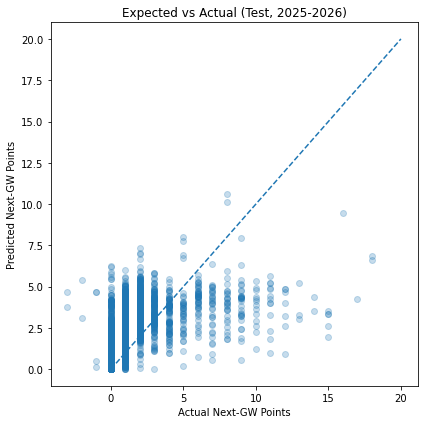

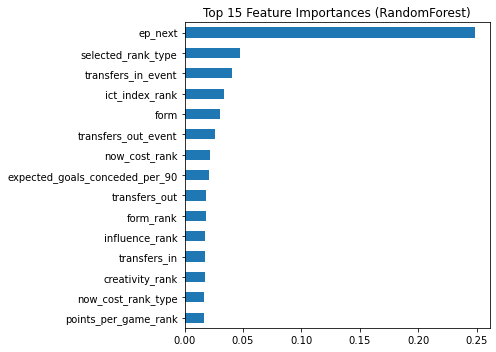

ep_next                           0.248599
selected_rank_type                0.047501
transfers_in_event                0.040973
ict_index_rank                    0.033370
form                              0.030077
transfers_out_event               0.025932
now_cost_rank                     0.021468
expected_goals_conceded_per_90    0.020693
transfers_out                     0.018119
form_rank                         0.018042
influence_rank                    0.017560
transfers_in                      0.017156
creativity_rank                   0.017152
now_cost_rank_type                0.017035
points_per_game_rank              0.016420
dtype: float64

In [12]:
# --- Cell 8 ---
pred = pred_rf  # choose which to visualize

plt.figure(figsize=(6,6))
plt.scatter(y_test, pred, alpha=0.25)
plt.xlabel("Actual Next-GW Points")
plt.ylabel("Predicted Next-GW Points")
plt.title(f"Expected vs Actual (Test, {current_season})")
plt.plot([0,20],[0,20], linestyle="--")
plt.tight_layout()
plt.show()

# Feature importances (RF)
importances = pd.Series(rf.feature_importances_, index=feature_cols).sort_values(ascending=False).head(15)
plt.figure(figsize=(7,5))
importances.sort_values().plot(kind="barh")
plt.title("Top 15 Feature Importances (RandomForest)")
plt.tight_layout()
plt.show()

importances


In [13]:
# --- Cell 9: Predict a user-specified Gameweek ---

#current_season = "2025-2026"   # change if needed
#user_target_gw = 8            # 👈 set this to the GW you want predictions for

#leaderboard, used_features = train_and_predict_for_gw(
 #   season=current_season,
#   target_gw=user_target_gw,
#    model_type="rf",    # "rf" or "ridge"
#    top_n=20
#)

#print(f"Top predicted players for GW {user_target_gw} ({current_season})")
#display_cols = ["last_name","pred_points","season","predicted_gw","gw","event_points","next_points"]
#leaderboard[ [c for c in display_cols if c in leaderboard.columns] ].head(20)


In [14]:
# --- Cell 9 (REPLACE): user chooses a GW; we validate & predict quickly ---

user_target_gw = 8  # 👈 change this; function will validate

try:
    leaderboard = train_and_predict_for_gw_fast(
        target_gw=user_target_gw,
        model_type="rf",
        top_n=20
    )
    print(f"Top predictions for GW {user_target_gw} in {current_season}")
    display_cols = ["last_name","pred_points","predicted_gw","gw","event_points","next_points"]
    display_cols = [c for c in display_cols if c in leaderboard.columns]
    
    
    from IPython.display import display

   

    # Make sure we actually have columns to show
    default_cols = ["last_name","pred_points","predicted_gw","gw","event_points","next_points"]
    display_cols = [c for c in default_cols if c in leaderboard.columns]
    if not display_cols:
        print("No expected columns present. Showing the whole frame instead.")
        display(leaderboard.head(20))
    else:
        display(leaderboard[display_cols].head(20))

except ValueError as e:
    print("Input error:", e)
    print("Tip: pick a GW in the valid range above, or try:", next_valid_gw())


Top predictions for GW 8 in 2025-2026


,last_name,pred_points,predicted_gw,gw,event_points,next_points
0,Semenyo,15.18,8,7,18,18.0
1,Malen,11.58,8,7,15,15.0
2,Bruno G.,9.76,8,7,14,14.0
3,J.Timber,9.58,8,7,11,11.0
4,Kudus,9.44,8,7,12,12.0
5,Rice,8.93,8,7,11,11.0
6,Burn,8.89,8,7,11,11.0
7,Gvardiol,8.88,8,7,12,12.0
8,Van Hecke,8.82,8,7,11,11.0
9,Haaland,8.53,8,7,8,8.0


In [15]:
# --- Cell 10 (fixed): save metrics + chosen GW leaderboard ---
from datetime import datetime
import pandas as pd
import numpy as np

outdir = REPO_ROOT / "projects" / "player-points" / "outputs"
outdir.mkdir(parents=True, exist_ok=True)

metrics = {
    "current_season": current_season,
    "timestamp": datetime.utcnow().isoformat() + "Z",
    "n_features": int(len(feature_cols)) if 'feature_cols' in globals() else None,
    "test_gws": sorted(df.loc[test_mask, "gw"].unique().tolist()) if 'test_mask' in globals() else [],
    "n_train": int(len(X_train)) if 'X_train' in globals() else None,
    "n_test": int(len(X_test)) if 'X_test' in globals() else None,
}

# Compute test metrics only if y_test exists and is non-empty
has_test = ('y_test' in globals()
            and isinstance(y_test, (pd.Series, np.ndarray, list))
            and len(y_test) > 0)

if has_test:
    metrics.update({
        "ridge": {
            "r2": float(r2_score(y_test, pred_ridge)),
            "mae": float(mean_absolute_error(y_test, pred_ridge)),
            "rmse": float(mean_squared_error(y_test, pred_ridge, squared=False)),
        },
        "random_forest": {
            "r2": float(r2_score(y_test, pred_rf)),
            "mae": float(mean_absolute_error(y_test, pred_rf)),
            "rmse": float(mean_squared_error(y_test, pred_rf, squared=False)),
        },
    })
else:
    metrics.update({
        "ridge": {"r2": None, "mae": None, "rmse": None},
        "random_forest": {"r2": None, "mae": None, "rmse": None},
    })

# Save metrics
pd.Series(metrics).to_json(outdir / "metrics.json")
print(f"Saved metrics → {outdir/'metrics.json'}")

# Save the per-GW predictions from Cell 9
pred_file = outdir / f"gw{user_target_gw}_predictions_{current_season}.csv"
leaderboard.to_csv(pred_file, index=False)
print(f"Saved leaderboard → {pred_file}")


Saved metrics → /Users/braydendong/Desktop/projects/FPL-Elo-Insights/projects/player-points/outputs/metrics.json
Saved leaderboard → /Users/braydendong/Desktop/projects/FPL-Elo-Insights/projects/player-points/outputs/gw8_predictions_2025-2026.csv
